## Finding Minimum Spanning Tree of the MNIST dataset

### Hsiang Hsu, hsianghsu@g.harvard.edu

In [117]:
# Basic Packages
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tqdm import tqdm
from random import sample 

# Tensorflow for mnist datasets
import tensorflow as tf

# sci-kit learn for constructing the graphs
from sklearn.neighbors import NearestNeighbors

# Scipy for minimum spanning tree
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree, connected_components, shortest_path

#
import cv2

# graphical and figure settings
import seaborn as sns
sns.set()
sns.set_style('white')
%matplotlib inline

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [156]:
# n_samples = 1000
# idx = np.random.choice(mnist.train.labels.shape[0], n_samples, replace=False)
# X = mnist.train.images[idx, :]

# 
n_samples = mnist.train.images.shape[0]
X = mnist.train.images

In [139]:
def video_maker(filename, imgs, shapes, FPS):
    # filename: string, e.g., xxx.avi
    # imgs: numpy array of images
    # sahpes: tuple of dimensions
    # FPS: int, frame per second
    
    # initialize video writer
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    video = cv2.VideoWriter(filename=filename, fourcc=fourcc, fps=float(FPS), frameSize=shapes)
    for i in range(imgs.shape[0]):
        frame = cv2.cvtColor(imgs[i, :].reshape(shapes)*255.0, cv2.COLOR_GRAY2RGB).astype('uint8')
        video.write(frame)
    cv2.destroyAllWindows()
    video.release()
    return

In [141]:
video_maker(filename='mnist_random.avi', imgs=X, shapes=(28, 28), FPS=24)

In [151]:
type(X)

numpy.ndarray

In [ ]:
neigh = NearestNeighbors(n_neighbors=100, radius=1.0, metric='minkowski', p=2).fit(X)
# graph = neigh.kneighbors_graph(X, mode='distance').toarray()
graph = neigh.radius_neighbors_graph(X, radius=10.0).toarray()

In [85]:
print('Number of connected components: {}'.format(connected_components(graph)[0]))

Number of connected components: 1


In [125]:
nodes = []
i = 0
diff_imgs = np.zeros((n_samples, 784))
starting = np.random.randint(0, n_samples, 1)

nodes.append(starting[0])
diff_imgs[i, :] = X[starting, :]

while len(nodes) != n_samples:
#     print(starting)
    
    neigh_dist, neigh_ind = neigh.kneighbors(X[starting, :].reshape(1, -1))
    neigh_ind = np.squeeze(neigh_ind)
#     print(neigh_ind)
    for j in range(len(nodes)):
        neigh_ind = np.delete(neigh_ind, np.where(neigh_ind==nodes[j]))
#     print(neigh_ind)
    if len(neigh_ind) != 0:
        nodes.append(neigh_ind[0])
        starting = neigh_ind[0]
        diff_imgs[i, :] = X[starting, :]
    else:
        all_ = np.arange(n_samples).tolist()
        candidates = [a for a in all_ if a not in nodes]
        starting = sample(candidates, 1)
        nodes.append(starting[0])
        diff_imgs[i, :] = X[starting, :]
    print('{}/{}'.format(len(nodes), n_samples), end="\r")
    
    i=i+1

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [86]:
neigh_dist, neigh_ind = neigh.kneighbors(X[0, :].reshape(1, -1))

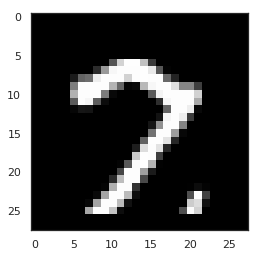

In [87]:
plt.imshow(X[0, :].reshape(28, 28), cmap='gray')

In [88]:
neigh_ind = np.squeeze(neigh_ind)
print(neigh_ind)

[  0 692 760 909  59 117 930 333 974 481]


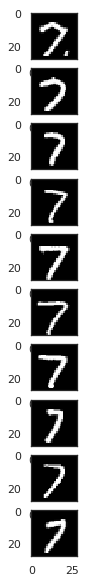

In [89]:
fig, ax = plt.subplots(len(neigh_ind), 1, figsize=(1, len(neigh_ind)*1))

for i in range(len(neigh_ind)):
    ax[i].imshow(X[neigh_ind[i], :].reshape(28, 28), cmap='gray')

In [95]:
residual = np.arange(n_samples).tolist()
nodes = []
diff_imgs = np.zeros((n_samples, 784))

starting = np.random.randint(0, n_samples, 1)
neigh_dist, neigh_ind = neigh.kneighbors(X[starting, :].reshape(1, -1))
while len(nodes) != n_samples:
    

In [99]:
nodes = []
nodes.append(starting[0])

In [120]:
all_ = np.arange(n_samples).tolist()
candidates = [a for a in all_ if a not in nodes]
starting = sample(candidates, 1) 

In [122]:
starting[0]

576

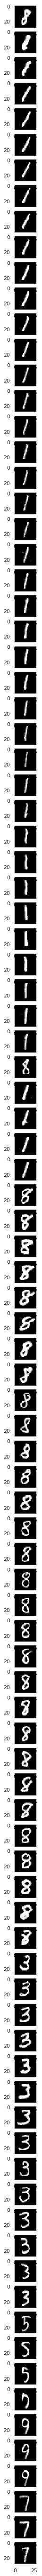

In [126]:
fig, ax = plt.subplots(100, 1, figsize=(1, 100*1))

for i in range(100):
    ax[i].imshow(diff_imgs[i, :].reshape(28, 28), cmap='gray')

In [150]:
video_maker(filename='mnist_diff.avi', imgs=X[nodes], shapes=(28, 28), FPS=24)

In [149]:
X[nodes][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
# mst = minimum_spanning_tree(graph).toarray().astype(int)
dist_matrix, predecessors = shortest_path(csr_matrix(graph), directed=False, return_predecessors=True)

In [54]:
predecessors

array([[-9999,     0,     1, ...,     0,     0,     0],
       [    1, -9999,     1, ...,     1,     0,     1],
       [    1,     2, -9999, ...,     1,    33,     1],
       ...,
       [   97,    97,     1, ..., -9999,     0,     0],
       [   98,     0,    33, ...,     0, -9999,     0],
       [   99,    99,     1, ...,     0,     0, -9999]], dtype=int32)

In [47]:
def get_path(Pr, i, j):
    path = [j]
    k = j
    while Pr[i, k] != -9999:
        path.append(Pr[i, k])
        k = Pr[i, k]
    return path[::-1]

path = get_path(Pr, i, j)


In [51]:
np.where(predecessors==-9999)[0][0]

0

In [8]:
def get_path(pre, end, n):
    P = pre
    path = [end]
    k = end
    while len(path) != n:
        i = np.where(P[:, k]!=-9999)
        print(i)
        path.append(P[i, k])
        P[k, :] == -9999
        k = P[i, k]
        
    return path[::-1].toarray()

In [9]:
path = get_path(predecessors, 0, 1000)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),)
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 0, 2, 3, 4, 5,
       6, 7, 8, 0, 1, 3, 4, 5, 6, 7, 8, 0, 1, 2, 4, 5, 6, 7, 8, 0, 1, 2,
       3, 5, 6, 7, 8, 0, 1, 2, 3, 4, 6, 7, 8, 0, 1, 2, 3, 4, 5, 7, 8, 0,
       1, 2, 3, 4, 5, 6, 8, 0, 1, 2, 3, 4, 5, 6, 7]))


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,81) (1,9) 

In [64]:
len(path)

1000